# Exploratory Data Analysis on bike sharing company's data

## Introduction

This notebook presents an Exploratory Data Analysis (EDA) on a bike sharing company. The dataset contains 17k+ observations with 17 features, collected from [link capitalbikeshare-data](https://s3.amazonaws.com/capitalbikeshare-data/index.html).

The aim of this analysis is to understand the data and gain insights into the bike sharing company's business. For instance, if you are a newly hired employee at a leadership position at this company, you will be interested in goals such customer satisfaction, employee morale, brand recognition, market share maximization, cost reduction, or revenue growth. Through this eda, the aim is to find patterns and make meaning full insights and observations to improve the above mentions goals and make important decisions. For all the above, its important to deep dive into the data. 

## Dataset Description

Here is a brief description of the features present in the dataset:

- `instant`: likely a unique identifier for each record.
- `dteday`: represents the date of the record.
- `season`: the season when the record was taken (e.g., Spring, Summer, Fall, Winter).
- `hr`: the hour of the day for the record.
- `holiday`: indicates whether the day of the record is a holiday.
- `weekday`: the day of the week when the record was taken.
- `casual`: likely the number of casual users or occurrences at the time of the record.
- `registered`: likely the number of registered users or occurrences at the time of the record.
- `count`: the total count (possibly the sum of casual and registered).

## EDA Outline

1. **Data Cleaning**: Check for missing data and handle them appropriately. Also, look for inconsistencies in the data and solve them.

## Credit

1. **Book**: Dive into Data Science Bradford Tuckfield

The original source of the bike-sharing data is [link Capital Bikeshare](https://ride.capitalbikeshare.com/system-data). The data was compiled and augmented by Hadi Fanaee-T and Joao Gama and posted online by Mark Kaghazgarian. 


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset inspection

In [7]:
# Load dataset
df = hour = pd.read_csv("../data/hours.csv")
# Display one day entries
hour.head(24)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


## Dataset shape

In [8]:
# Shape of the dataset.
observations, features = hour.shape
print(f"There are {observations} number of observations in this dataset.")
print(f"There are {features} number of features in this dataset.")


There are 17379 number of observations in this dataset.
There are 17 number of features in this dataset.


In [9]:
columns = hour.columns.tolist()
columns

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'count']

## Summary Statistics

Rough measurement of the size of the business over the two years

In [10]:
hour.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In addition to the mean above, we calculate the other metrices

In [11]:

desc = hour.describe()
print(f"The 25% of hours in the dataset has {desc.loc['25%', 'count']} or fewer bikes.")
print(f"The 75% of the hours in the data has {desc.loc['75%', 'count']} bikes.")
print(f"The minimum registered number at an hour is: {hour['registered'].min()}")
print(f"THe maxium registered number at an hour is: {hour['registered'].max()}")

The 25% of hours in the dataset has 40.0 or fewer bikes.
The 75% of the hours in the data has 281.0 bikes.
The minimum registered number at an hour is: 0
THe maxium registered number at an hour is: 886


## Observations so far
1. The above matrics are important to understand. The number of registered users ranges from 0 - 886, and this tells us the hourly record that you will need to break if you want your business to do better than before. 
2. The riders are much less at night time and improve the day time.
3. There is much wide variation in the hourly count of users: 25 percent of hours have fewer than 40 rider but there is one hour that had 886 riders. As a leader, you will need to ensure to get closer to this higher number of riders and have much lower number in the 25% percentile. 
4. You could lower the price of the ride at night time to lure more riders. 

## Missing entries

In [12]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [13]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [14]:
hour.notna().sum()

instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
count         17379
dtype: int64

## Duplicate enteries

In [15]:
duplicate_entries = hour.duplicated().sum()
if duplicate_entries == 0:
  print("There are no duplicate entries in this dataset.")
else:
  print(f"There are {duplicate_entries} duplicate entries in this dataset")

There are no duplicate entries in this dataset.


## Night time data
#### Assumptions
1. Let's assume that night time is from midnight onwards and before 5AM.

In [16]:
# Check all the nighttime data for registered users
all_nighttimes_registerd_users_mean = hour.loc[hour["hr"] < 5, "registered"].mean()
all_daytimes_registerd_users_mean = hour \
        .loc[(hour["hr"] > 5) & (hour["hr"] < 18) , "registered"] \
        .mean()
print(f"The average of all night time registered riders is {round(all_nighttimes_registerd_users_mean, 2)}.")
print(f"The average of all day time registered riders is {round(all_daytimes_registerd_users_mean, 2)}.")

The average of all night time registered riders is 20.79.
The average of all day time registered riders is 200.75.


The above variation is quite significant and needs to be improved in the night time. Even though, at night there are roads are less crowded but there is room for an improvement. 

## Seasonal Data
In this dataset, the season variable represents 4 seasons in an year.
1. Winter: 1
2. Sprint: 2
3. Summer: 3
4. Fall or autumn: 4

Find the average number of riders during each of this season.

In [17]:
hour.groupby(["season"])["count"].mean()

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: count, dtype: float64

## Observation

There is a definite pattern in the above output. THere are more riders in the spring, fall and summer seasons. 

Add holiday variable to view the holidays and non holidays periods along with the seasons. The off season is indicated by 0 and the on season is indicated by 1.

In [18]:
hour.groupby(["season", "holiday"])["count"].mean()


season  holiday
1       0          112.685875
        1           72.042683
2       0          208.428472
        1          204.552083
3       0          235.976818
        1          237.822917
4       0          199.965998
        1          167.722222
Name: count, dtype: float64

## More observations

It seams like that the ridership in warmer periods in both holidays and non-holiday periods are the same as compared to the colder seasons where we a drop in the holiday period.

## Plotting
### Scatterplot Graph

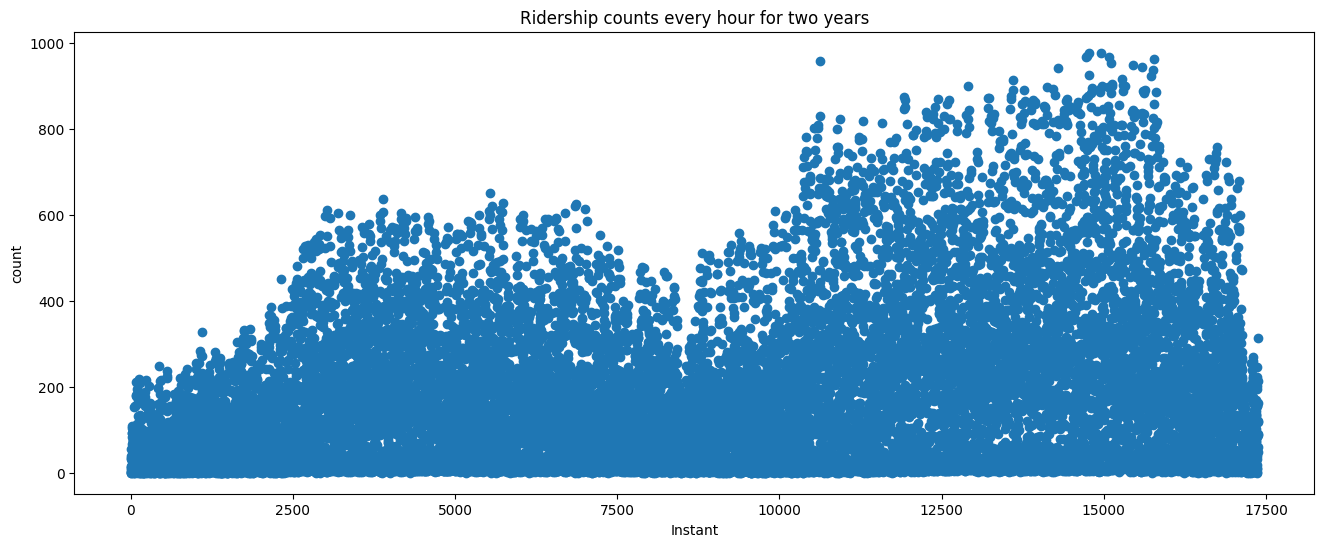

In [19]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(x=hour["instant"], y=hour["count"])
plt.title("Ridership counts every hour for two years")
plt.xlabel("Instant")
plt.ylabel("count")
plt.show()

Looking at this plot, there is a growth of rideship overtime.
Let's also check the small chunk of the data to see the scatter plot. For instance, let's check the last week of the dataset to avoid the problem of overlapping points. Its a good idea to plot both entire and a smaller chunk of data to observe both scales.

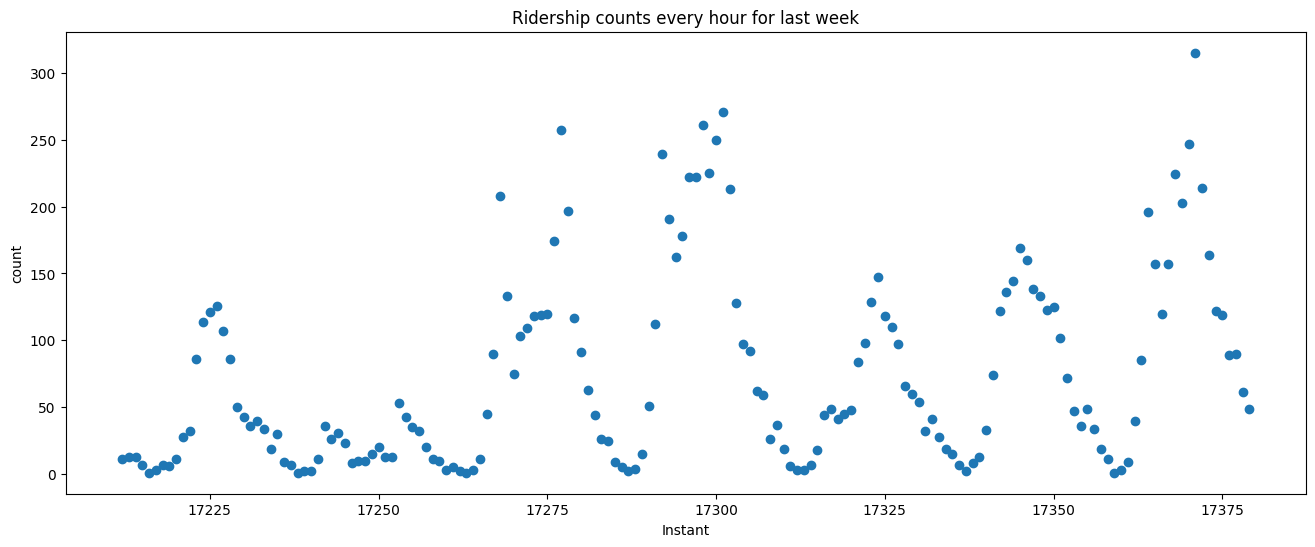

In [48]:
# Last month subset
last_week_subset = hour.iloc[-168:,:] 
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(x = last_week_subset["instant"], y = last_week_subset["count"])
plt.title("Ridership counts every hour for last week")
plt.xlabel("Instant")
plt.ylabel("count")
plt.show()

Checking the last week data clearly shows that there is a significant variance among the days. It could be possible that the weekends ride hiring is different from the weekedays.

### Weekends and weekdays

In [21]:
# Check the weeday unique values
week = hour["weekday"].unique()
week

array([6, 0, 1, 2, 3, 4, 5])

Let's evaluate the very first day of the business. What day was it? Because it seems the weekdays are allocated a unique number.

In [22]:
from datetime import datetime

# Get the first date as a string of the very first day of the business
date_string = hour.head(1)["dteday"].iloc[0]

# convert the pandas series to datetime object
date_object = pd.to_datetime(date_string)

# Display the day
weekday = date_object.strftime("%A")
print(f"The very first day of the business is {weekday}.")


The very first day of the business is Saturday.


Now check the what was the weekday on the very first day.

In [23]:
hour.head(1)["weekday"].iloc[0]

6

### Observation
Its clear from the above two outputs that the first day of the business was saturday and the weekday number assigned to saturday is 6. Here are the assigned numbers for each day:
- Saturday : 6
- Sunday : 0
- Monday : 1
- Tuesday : 2
- Wednesday : 3
- Thursday : 4
- Friday : 5
   

In [24]:
weekday_dict = {6: 'Saturday', 0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday'}
hour["weekday_label"] = hour["weekday"].map(weekday_dict)
hour["weekday_label"].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [25]:
hour\
  .groupby(["weekday_label"])["count"].mean()

weekday_label
Friday       196.135907
Monday       183.744655
Saturday     190.209793
Sunday       177.468825
Thursday     196.436665
Tuesday      191.238891
Wednesday    191.130505
Name: count, dtype: float64

In [26]:
total_sum_of_riders_mean = hour.groupby(["weekday_label"])["count"].mean().sum()
weekday_label_percentages = hour.groupby(["weekday_label"])["count"].mean() / total_sum_of_riders_mean * 100
print("The weekday average percentages are:")
round(weekday_label_percentages.sort_values(ascending=False),0)

The weekday average percentages are:


weekday_label
Thursday     15.0
Friday       15.0
Tuesday      14.0
Wednesday    14.0
Saturday     14.0
Monday       14.0
Sunday       13.0
Name: count, dtype: float64

### Observations
The average number of riders varies slightly throughout the week, with the lowest average count on Sundays [13.0%] and the highest [15.0%] on Thursdays.

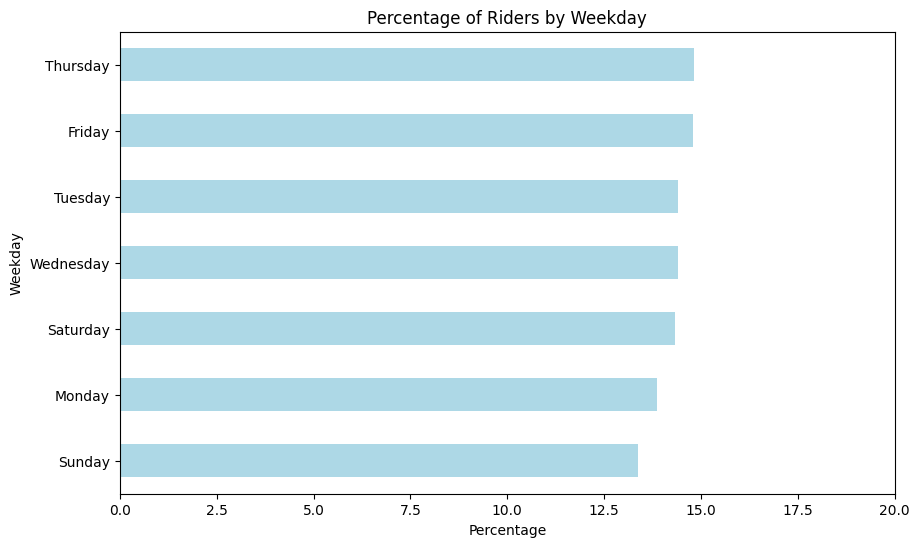

In [27]:
# Plot the percentages
plt.figure(figsize=(10,6))
weekday_label_percentages.sort_values().plot(kind='barh', color='lightblue')
plt.xlim([0,20])
plt.xlabel('Percentage')
plt.ylabel('Weekday')
plt.title('Percentage of Riders by Weekday')
plt.show()

### Summary statistics of the last week of the dataset

In [51]:

last_one_week_subset = hour.iloc[-168:, :]
last_one_week_subset["count"].describe()

count    168.000000
mean      74.642857
std       72.695681
min        1.000000
25%       13.000000
50%       46.000000
75%      119.250000
max      315.000000
Name: count, dtype: float64

Checking the reason for the dip observed the scatterplot. Weather situation maybe the reason for the dip. The weathersit variable is categorised and mapped as follows:

1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.

In [64]:
# Check the weather situation with fewer riders
fewer_riders_count = last_one_week_subset\
  .loc[last_one_week_subset["count"] <= 25]["weathersit"]\
  .value_counts()

sum_of_all_weather = fewer_riders_count.sum()

print("WEATHER SITUATION FOR FEWER RIDERS:")

# Percentatge
round(fewer_riders_count.sort_index() / sum_of_all_weather * 100,2)


WEATHER SITUATION FOR FEWER RIDERS:


weathersit
1    17.86
2    57.14
3    25.00
Name: count, dtype: float64

In [66]:
# Check the weather situation with higer number of riders
fewer_riders_count = last_one_week_subset\
  .loc[last_one_week_subset["count"] >=75]["weathersit"]\
  .value_counts()

sum_of_all_weather = fewer_riders_count.sum()

print("WEATHER SITUATION FOR HIGH NUMBER OF RIDERS:")

# Percentatge
round(fewer_riders_count.sort_index() / sum_of_all_weather * 100,2)

WEATHER SITUATION FOR HIGH NUMBER OF RIDERS:


weathersit
1    47.76
2    50.75
3     1.49
Name: count, dtype: float64

### Observation
Comparing the two above results, the weather has impacted the dip evident in the scatter plot in the last week. Seems like weather is likely to impact the rider's decision to ride. Based on the data you've provided, your observation seems correct. It looks like the weather situation (`weathersit`) does impact the rider's decision to ride, with clear weather (represented by `1`) being more favorable for a higher number of riders.

In the data for a high number of riders, nearly 48% of riders prefer `weathersit = 1` (clear or partly cloudy conditions), while in the data for fewer riders, only about 18% of riders are present in `weathersit = 1`.

Conversely, in `weathersit = 2` (misty or cloudy conditions) and `weathersit = 3` (light snow or light rain), the proportions of riders are higher when there are fewer riders overall.

Riders appear to prefer riding under clear or partly cloudy conditions and are less likely to ride under misty, cloudy, or light precipitation conditions.